# Project 1: SAT & ACT Analysis
### EDA and Visualizations

## Purpose of this Notebook

_Standardized college tests are the key for high school seniors need to have in order to access the world of college. Evaluating students across different locations, demographics, and societies through a standardized test is one of the ways that colleges can get an objective idea of how prepared a student is to succeed in college._ 

_This notebook will perform exploratory data analysis, as well as create visualizations to aid in coming to a conclusion to the problem statement at hand._

In [1]:
# Library and function imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Separate Python file with simple functions to clean and engineer the data
from simple_functions import stan_dev, draw_heatmap

final = pd.read_csv('./data/final.csv', )

In [2]:
final.head()

,state,2017_sat_part,2017_sat_read,2017_sat_math,2017_sat_total,2017_act_part,2017_act_eng,2017_act_math,2017_act_read,2017_act_science,...,2017_act_total_standardized,2018_act_total_standardized,sat_score_pct_change,sat_partication_pct_change,act_score_pct_change,act_participation_pct_change,median_income,college_bound,education_revenue,2017_pop_est
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,-1.159348,-1.143654,0.000858,0.200000,-0.005208,0.000000,46257,62.1,7.44,4874747
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,-0.859466,-0.332903,0.024074,0.131579,0.050505,-0.492308,76440,44.0,2.94,739795
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,-0.909446,-1.095963,0.029570,-0.033333,-0.025381,0.064516,53558,52.3,9.86,7016270
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,-1.059388,-1.000580,-0.032285,0.666667,0.000000,0.000000,44334,63.5,5.28,3004279
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,0.639945,0.573230,0.019905,0.132075,-0.004386,-0.129032,67739,60.9,74.40,39536653


## Exploratory Data Analysis


### Summary Statistics
Using the describe() function, we can get a quick overview of the data

In [3]:
# Using the .describe() function to get an overview of the data 
final.describe().T

,count,mean,std,min,25%,50%,75%,max
2017_sat_part,51.0,3.980392e+01,3.527663e+01,2.000000,4.000000e+00,3.800000e+01,6.600000e+01,1.000000e+02
2017_sat_read,51.0,5.691176e+02,4.566690e+01,482.000000,5.335000e+02,5.590000e+02,6.130000e+02,6.440000e+02
2017_sat_math,51.0,5.568824e+02,4.712140e+01,468.000000,5.235000e+02,5.480000e+02,5.990000e+02,6.510000e+02
2017_sat_total,51.0,1.126098e+03,9.249481e+01,950.000000,1.055500e+03,1.107000e+03,1.212000e+03,1.295000e+03
2017_act_part,51.0,6.525490e+01,3.214084e+01,8.000000,3.100000e+01,6.900000e+01,1.000000e+02,1.000000e+02
2017_act_eng,51.0,2.093137e+01,2.353677e+00,16.300000,1.900000e+01,2.070000e+01,2.330000e+01,2.550000e+01
2017_act_math,51.0,2.118235e+01,1.981989e+00,18.000000,1.940000e+01,2.090000e+01,2.310000e+01,2.530000e+01
2017_act_read,51.0,2.201373e+01,2.067271e+00,18.100000,2.045000e+01,2.180000e+01,2.415000e+01,2.600000e+01
2017_act_science,51.0,2.145098e+01,1.739353e+00,18.200000,1.995000e+01,2.130000e+01,2.320000e+01,2.490000e+01
2017_act_total,51.0,2.151961e+01,2.020695e+00,17.800000,1.980000e+01,2.140000e+01,2.360000e+01,2.550000e+01


At this point, I decided to manually calculate the standard deviation, for practice and principle. This function can be found in the separate Python file.

#### Manually calculate standard deviation
$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [4]:
# Used dictionary comprehension to apply manual standard deviation function 
# to each numeric column in the dataframe
{key : stan_dev(final[key])for key in list(final.to_dict(orient='list').keys())[1:]}

{'2017_sat_part': 34.92907076664508,
 '2017_sat_read': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_part': 31.824175751231806,
 '2017_act_eng': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_read': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_total': 2.000786081581989,
 '2018_sat_part': 36.946619223539415,
 '2018_sat_read': 47.03460978357609,
 '2018_sat_math': 47.30194550378352,
 '2018_sat_total': 93.22742384464433,
 '2018_act_part': 33.7423692371741,
 '2018_act_total': 2.0968220768561987,
 '2017_sat_total_standardized': 1.0,
 '2018_sat_total_standardized': 0.9999999999999998,
 '2017_act_total_standardized': 1.0,
 '2018_act_total_standardized': 0.9999999999999998,
 'sat_score_pct_change': 0.042966904816162534,
 'sat_partication_pct_change': 1.7531882396782321,
 'act_score_pct_change': 0.033198393793894415,
 'act_participation_pct_change': 0.16165325384032855,
 'median_income': 9

In [5]:
# Also used Numpy's standard deviation function for comparison
{key : np.std(final[key])for key in list(final.to_dict(orient='list').keys())[1:]}

{'2017_sat_part': 34.92907076664508,
 '2017_sat_read': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_part': 31.824175751231806,
 '2017_act_eng': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_read': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_total': 2.000786081581989,
 '2018_sat_part': 36.946619223539415,
 '2018_sat_read': 47.03460978357609,
 '2018_sat_math': 47.30194550378352,
 '2018_sat_total': 93.22742384464433,
 '2018_act_part': 33.7423692371741,
 '2018_act_total': 2.0968220768561987,
 '2017_sat_total_standardized': 1.0,
 '2018_sat_total_standardized': 0.9999999999999998,
 '2017_act_total_standardized': 1.0,
 '2018_act_total_standardized': 0.9999999999999998,
 'sat_score_pct_change': 0.042966904816162534,
 'sat_partication_pct_change': 1.7531882396782321,
 'act_score_pct_change': 0.033198393793894415,
 'act_participation_pct_change': 0.16165325384032855,
 'median_income': 9

_It seems that my manual function to calculate standard deviation produces the same values as numpy's std function, but different results from pandas describe() function by a small amount. This could be due to differences in writing the function for efficiency on the Pandas dataframe._

### Investigate trends in the data
Using sorting and masking I investigated any trends in the data, first seeing what states had the highest and lowest participation rates and total scores.

In [6]:
# Used filtering to find states with the highest 
# and lowest participation rates
final.sort_values(by='2018_act_part')[['state','2018_act_part']].head()

,state,2018_act_part
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


*Using filtering, I determined the following:*
- state with the lowest 2017 SAT participation rate was North Dakota at 2%
- state with the lowest 2018 SAT participation rate was North Dakota at 2%
- state with the lowest 2017 ACT participation rate was Maine at 8%
- state with the lowest 2018 ACT participation rate was Maine at 7%

*However, there are many states that require mandatory SAT or ACT testing. Therefore, finding the states with the highest participation rates for both the SAT and ACT is unncessary, since some states are at a 100% participation rate. Perhaps a state that is worth noting is Colorado, since the transition year between 2017 and 2018 was the year that Colorado switched from administering the ACT to the SAT test.*

In [7]:
# Used masking to determine states with the highest total scores.
mask = final['2017_act_total'] > final['2017_act_total'].mean()
final[mask][['state','2017_act_total']].sort_values(by='2017_act_total',ascending=False).head()

,state,2017_act_total
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
32,New York,24.2


In [8]:
# Used masking to determine states with the lowest total scores.
mask = final['2018_act_total'] < final['2018_act_total'].mean()
final[mask][['state','2018_act_total']].sort_values(by='2018_act_total').head()

,state,2018_act_total
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


*Using masking, I determined the following:*
- The state with the highest 2017 SAT total score was Minnesota at 1295
- The state with the lowest 2017 SAT total score was Delaware at 996
- The state with the highest 2018 SAT total score was Minnesota at 1298
- The state with the lowest 2018 SAT total score was Delaware at 998
- The state with the highest 2017 ACT total score was New Hampshire at 25.5
- The state with the lowest 2017 ACT total score was Nevada at 17.8
- The state with the highest 2018 ACT total score was Connecticut at 25.6
- The state with the lowest 2018 ACT total score was Nevada at 17.7

*It seems more than likely that states with the highest and lowest scores repeated their streaks in 2017 and 2018 (Minnesota had the highest score for the SAT two years in a row, Delaware had the lowest SAT score for two years in a row), perhaps signifying a bigger underlying issue(s) that is impacting those scores.*

In [9]:
final.columns

Index(['state', '2017_sat_part', '2017_sat_read', '2017_sat_math',
       '2017_sat_total', '2017_act_part', '2017_act_eng', '2017_act_math',
       '2017_act_read', '2017_act_science', '2017_act_total', '2018_sat_part',
       '2018_sat_read', '2018_sat_math', '2018_sat_total', '2018_act_part',
       '2018_act_total', '2017_sat_total_standardized',
       '2018_sat_total_standardized', '2017_act_total_standardized',
       '2018_act_total_standardized', 'sat_score_pct_change',
       'sat_partication_pct_change', 'act_score_pct_change',
       'act_participation_pct_change', 'median_income', 'college_bound',
       'education_revenue', '2017_pop_est'],
      dtype='object')

In [10]:
# States with increased participation on SAT over the years
mask = (final['sat_partication_pct_change'] > 0) & (final['act_participation_pct_change'] < 0) 
final[mask][['state', 'sat_score_pct_change', 'act_score_pct_change']]

,state,sat_score_pct_change,act_score_pct_change
1,Alaska,0.024074,0.050505
4,California,0.019905,-0.004386
5,Colorado,-0.146545,0.149038
10,Georgia,0.013333,0.000000
11,Hawaii,-0.069124,-0.005263
12,Idaho,-0.003980,0.000000
13,Illinois,-0.086099,0.116822
19,Maine,0.000988,-0.012346
21,Massachusetts,0.016260,0.003937
23,Minnesota,0.002317,-0.009302


In [11]:
# States with increased ACT participation over the years
mask = (final['sat_partication_pct_change'] < 0) & (final['act_participation_pct_change'] > 0) 
final[mask][['state', 'sat_score_pct_change', 'act_score_pct_change']]

,state,sat_score_pct_change,act_score_pct_change
2,Arizona,0.02957,-0.025381


_The filtering above shows that there has been a general increase in participation rate for the SAT test (19 states have increased SAT participation and decreased ACT participation, as opposed to 1 state with the opposite). Interestingly, 6 states have a decreased SAT score percentage change with increased SAT participation._

## Visualizing the data

When first visualizing the data, I decided to use a heatmap. Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

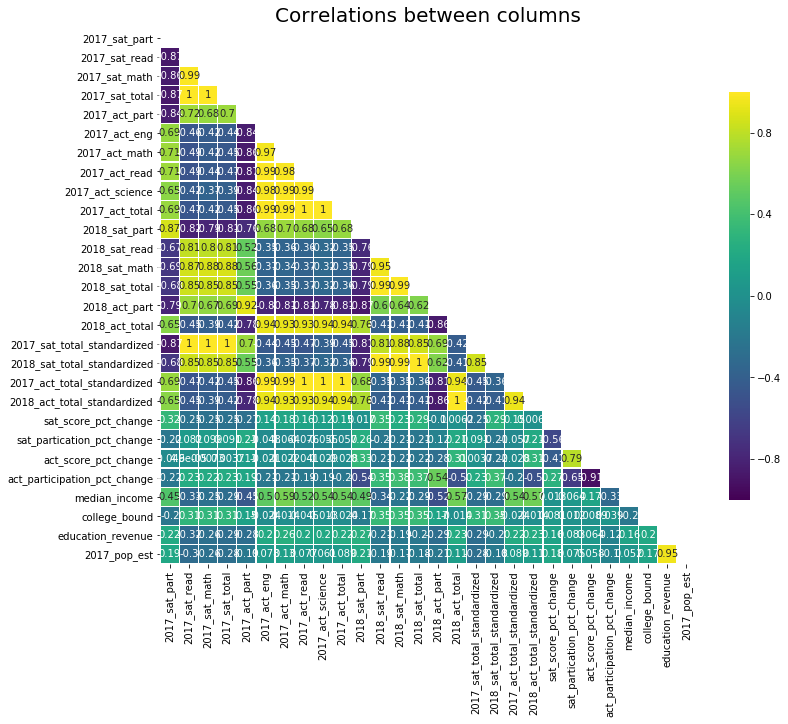

In [12]:
# The function is found in the separate Python file
draw_heatmap(final)

In [13]:
# Creating subsets of the data for better visualizations
subs = final.drop(['2017_sat_total', '2017_sat_read', '2017_sat_math', 
                  '2017_act_total', '2017_act_eng', '2017_act_math', 
                  '2017_act_read', '2017_act_science',
                  '2018_sat_total', '2018_sat_read', '2018_sat_math',
                  '2018_act_total'],
                  axis=1)

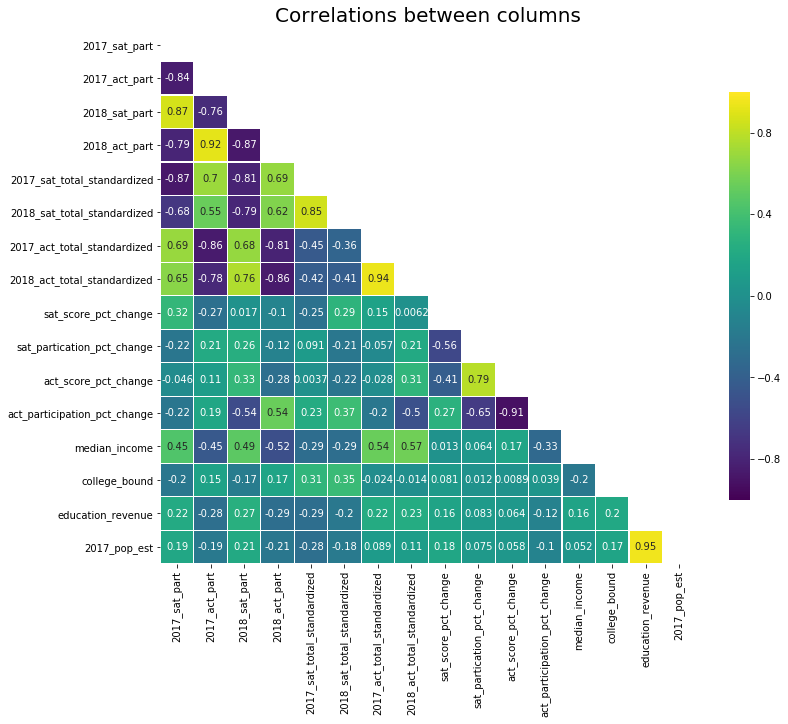

In [14]:
draw_heatmap(subs)

In [15]:
movement = subs.drop(['2017_sat_part', '2017_act_part', 
                      '2018_sat_part', '2018_act_part', 
                      'college_bound', 'education_revenue', '2017_pop_est'],
                    axis = 1)

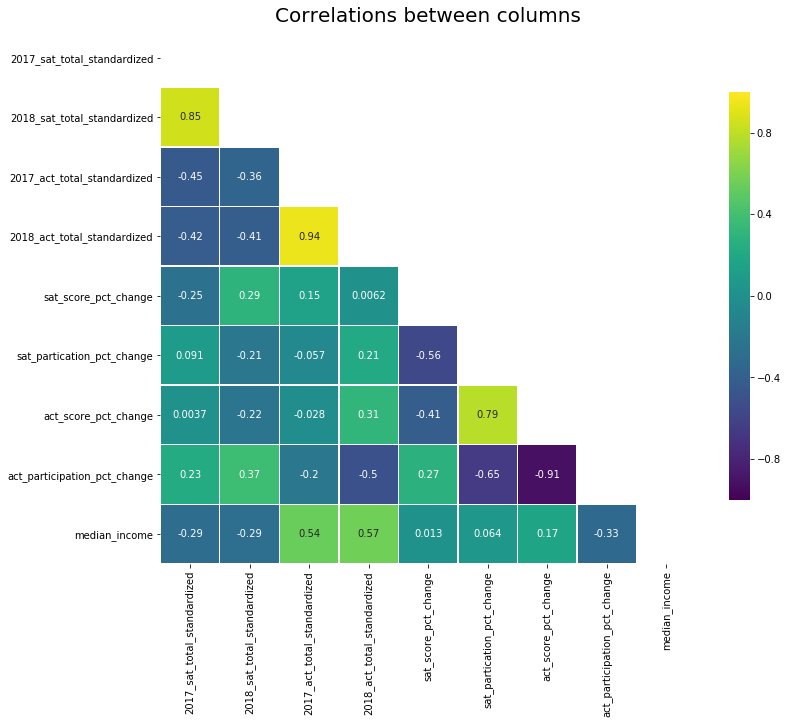

In [16]:
draw_heatmap(movement)

_Some points of interest is the **high negative correlation between high achievement on the SAT (or ACT) test and their respective total scores** (ie. the correlation between 2017 SAT Participation and 2017 SAT Total score is -0.87). Also interesting is the **high negative correlation between 2017 SAT and ACT participation (-0.84)**. Perhaps unsurprisingly, the correlation between **a test's total score is highly positive with its subscores** (ie. 2017 ACT total and 2017 ACT Math has a correlation of 0.99). Something to note from the extra data that was added is that the **Population (2017 estimate) and Education revenue is highly correlated at 0.95**._

### Histograms to visualize distribution

We can use histograms to get a general picture of a set of data's distribution and see whether or not the data is normal or not.

In [17]:
# Wrote a custom function to draw histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows          
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,nrows*4)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].axvline(dataframe[column].mean(), color='r', alpha=0.7)
    plt.tight_layout()

- Participation rates for SAT & ACT

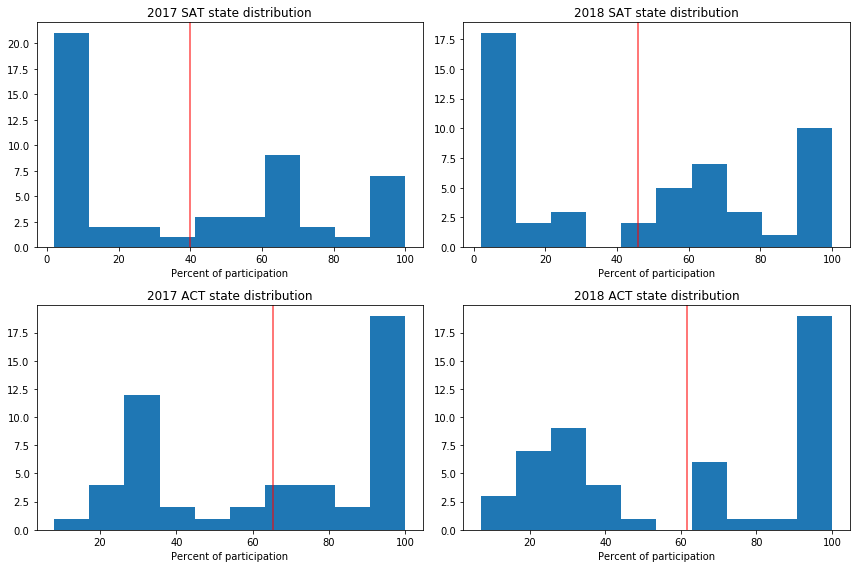

In [18]:
subplot_histograms(final, 
                   ['2017_sat_part','2018_sat_part','2017_act_part','2018_act_part'], 
                   ['2017 SAT state distribution','2018 SAT state distribution','2017 ACT state distribution','2018 ACT state distribution'],
                   ['Percent of participation','Percent of participation','Percent of participation','Percent of participation'])

_The distribution of participation rates by state is shown above. The red line demarcates the average participation rate for all states. On a high level, it seems that the average SAT participation rate is slowly increasing (from about 39% to 43%) and the average ACT participation rate is slowly decreasing (from about 65% to 61%) from 2017 to 2018. However, there is still a heavy portion of SAT participation rates below 20%, and a heavy portion of ACT participation rates above 80%. This probably indicates that the ACT is still the mandatory test for many states._ 

- Math scores for SAT & ACT

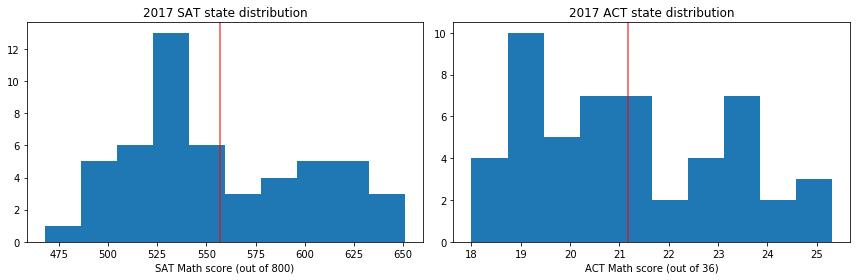

In [19]:
subplot_histograms(final, 
                   ['2017_sat_math', '2017_act_math'], 
                   ['2017 SAT state distribution', '2017 ACT state distribution'],
                   ['SAT Math score (out of 800)','ACT Math score (out of 36)'])

_The average SAT math score amongst the states is around 560 and the ACT math score is about 21.2. According to online conversion tools, the SAT score of 560 correlates to an ACT score of 23, which is higher than the actual ACT average.  
However, it seems that the distribution of SAT math scores is skewed right, with the majority of scores under the mean, whereas the distribution of the ACT math scores seems to be more evenly distributed (although also a bit skewed right). The SAT distribution is bimodal, with high density of scores occurring between 600 and 625. The ACT distribution seems to have various peaks of high density in the upper end, as well. This could possibly be the states that do not have mandatory state testing, where students who choose to take the test will achieve generally higher than those who are required to take the test._

- Reading/verbal scores for SAT & ACT

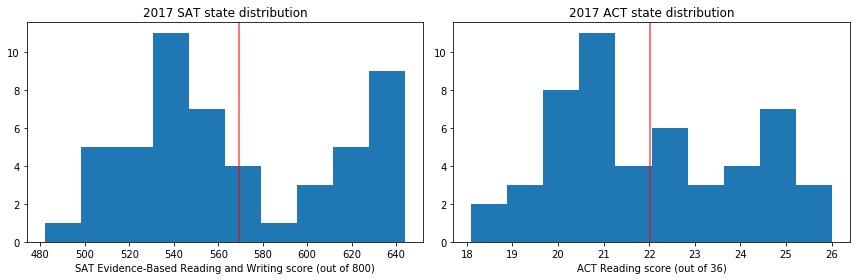

In [20]:
subplot_histograms(final, 
                   ['2017_sat_read', '2017_act_read'], 
                   ['2017 SAT state distribution', '2017 ACT state distribution'],
                   ['SAT Evidence-Based Reading and Writing score (out of 800)','ACT Reading score (out of 36)'])

_The average SAT score amongst the states is around 570 and the average ACT score is about 22. Using the online conversion tool, an SAT score of 570 roughly translates to an ACT score of about 25, which is higher than the actual ACT average.  
Interestingly, the SAT reading scores has two peaks, with one occuring below the mean and the other occurring well above the mean. Once again, this is probably due to the nature of mandatory testing. The ACT reading scores seem to have three peaks._

### Scatter plots to visualize correlation

We can use scatter plots to see what the relationship between two sets of data looks like, and determine whether they are highly correlated or not. In my scatter plots, I used a red line to denote the mean value of each data set, to help us visualize the data.

In [21]:
# Wrote a custom function to draw scatter plots
def subplot_scatter(dataframe, xcol, ycol, title, xlabel, ylabel):            
    fig, ax = plt.subplots(figsize = (8, 6))
    plt.scatter(dataframe[xcol], dataframe[ycol])
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axvline(dataframe[xcol].mean(), color='r', alpha = 0.5)
    plt.axhline(dataframe[ycol].mean(), color='r', alpha = 0.5)

- SAT vs. ACT math scores for 2017

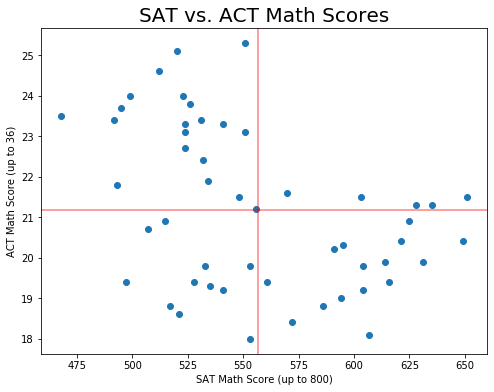

In [22]:
subplot_scatter(final,
                '2017_sat_math',
                '2017_act_math',
                'SAT vs. ACT Math Scores', 
                'SAT Math Score (up to 800)',
                'ACT Math Score (up to 36)')

_The above scatter plot of SAT Math and ACT Math scores reveals some interesting insight. The red lines signify the mean values for each test and they divide up the scatter plot into quadrants. Normally, we would expect that achievement on one math test would correlate to similar achievement on the other (since we assume that the math being tested on is the same math!). Therefore, we would assume most of our data points in the scatter plot to fall into either the top right or the bottom left quadrants. But contrary to expectation, most of the data falls into the top left and the bottom right quadrants, meaning that there is **a negative correlation between the math scores**. Odd to think about, but there could be other factors at play here.  
Based on the other information, we can conclude that states that have mandatory testing of the SAT will have a lower average math score but a higher ACT math score, and vice versa.  
What is perhaps more concerning are the **states that fall below average for both tests.** Let's call this bottom-left quadrant the "Danger Zone." These would be states that, regardless of mandatory testing or not, have generally poorer average test achievement. Using masking, we can determine those states to be the following:_

In [23]:
# Bit-masking to filter out states that scored below average 
# on both the SAT Math and ACT Math subsections
mask = (final['2017_sat_math'] < final['2017_sat_math'].mean()) & (final['2017_act_math'] < final['2017_act_math'].mean())
final[mask][['state','2017_sat_math','2017_act_math','2017_sat_part','2017_act_part', 'median_income']]

,state,2017_sat_math,2017_act_math,2017_sat_part,2017_act_part,median_income
1,Alaska,533,19.8,38,65,76440
2,Arizona,553,19.8,30,62,53558
9,Florida,497,19.4,83,73,50860
10,Georgia,515,20.9,61,55,53559
11,Hawaii,541,19.2,55,90,74511
28,Nevada,553,18.0,26,100,55180
33,North Carolina,535,19.3,49,100,50584
36,Oklahoma,517,18.8,7,100,52334
40,South Carolina,521,18.6,50,100,49501
43,Texas,507,20.7,62,45,56565


_Interestingly, the sum of the partipation rates for the SAT and ACT are over 100% for almost every state on the list (Arizona and West Virginia). Deeper inspection reveals that [Arizona is passing a bill that requires students to take either the SAT or ACT (free-of-charge)](https://www.azleg.gov/legtext/53leg/2R/bills/HB2037P.pdf), and [West Virginia participated in "SAT Day" in Spring 2018](https://wvde.state.wv.us/news/3413/).   
Another statistic to note is that for most of these states, the ACT participation rate is higher than the SAT participation rate (except for Florida, Georgia, and Texas).  
One explanation can be the mandatory testing and its effects on achievement.
Another explanation (to be revealed later) is that there is a general correlation between states with lower median income and ACT participation, and states with higher median income and SAT participation. Perhaps this can also help explain the fact that these states might have lower median incomes._

- SAT vs. ACT verbal/reading scores for 2017

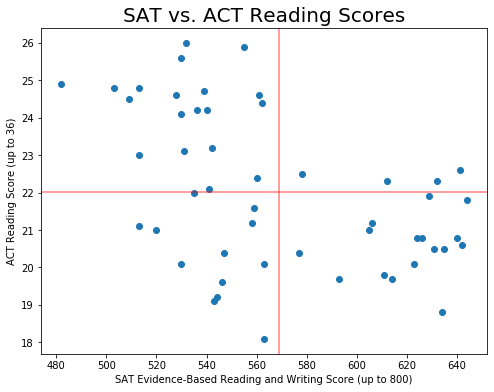

In [24]:
subplot_scatter(final,
                '2017_sat_read',
                '2017_act_read',
                'SAT vs. ACT Reading Scores', 
                'SAT Evidence-Based Reading and Writing Score (up to 800)',
                'ACT Reading Score (up to 36)')

Following the same theme with the Math scores, there seems to be a general negative correlation with Reading scores, as well. Once again, the states in the bottom left quadrant (the so-called "Danger Zone") are the following:

In [25]:
mask = (final['2017_sat_read'] < final['2017_sat_read'].mean()) & (final['2017_act_read'] < final['2017_act_read'].mean())
final[mask][['state','2017_sat_read','2017_act_read','2017_sat_part','2017_act_part']]

,state,2017_sat_read,2017_act_read,2017_sat_part,2017_act_part
1,Alaska,547,20.4,38,65
2,Arizona,563,20.1,30,62
9,Florida,520,21.0,83,73
10,Georgia,535,22.0,61,55
11,Hawaii,544,19.2,55,90
13,Illinois,559,21.6,9,93
28,Nevada,563,18.1,26,100
33,North Carolina,546,19.6,49,100
36,Oklahoma,530,20.1,7,100
40,South Carolina,543,19.1,50,100


_Surprise! The states in the "Danger Zone" for math also are in the "Danger Zone" for reading! There is one more state added to this list, which is Illinois. These states are perhaps in a bad educational "state", although there could be a plethora of other factors that play into this._

- SAT vs. ACT total/composite scores for 2017

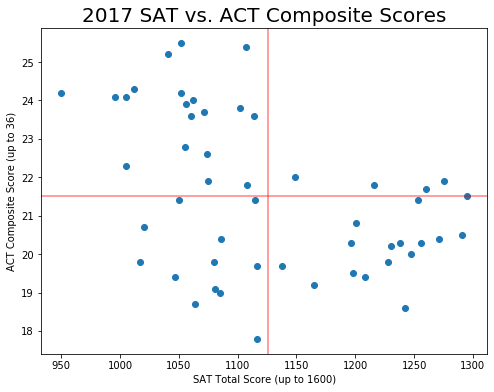

In [26]:
subplot_scatter(final,
                '2017_sat_total',
                '2017_act_total',
                '2017 SAT vs. ACT Composite Scores', 
                'SAT Total Score (up to 1600)',
                'ACT Composite Score (up to 36)')
plt.savefig('Scatter Plot without red lines 2017 SAT and ACT Composite Scores.png')

_The "Danger Zone" for the total composite score on the SAT and ACT consists of the twelve states mentioned in the previous discussion of Math and Reading scores. Once again, the general pattern is that of a negative correlation. Perhaps another topic of interest are the states in the upper right quadrant. These states scored better than the average for both the SAT and ACT and are worth looking into at this time._

In [27]:
mask = (final['2017_sat_total'] > final['2017_sat_total'].mean()) & (final['2017_act_total'] > final['2017_act_total'].mean())
final[mask][['state','2017_sat_total','2017_act_total','2017_sat_part','2017_act_part']]

,state,2017_sat_total,2017_act_total,2017_sat_part,2017_act_part
15,Iowa,1275,21.9,2,67
16,Kansas,1260,21.7,4,73
35,Ohio,1149,22.0,12,75
41,South Dakota,1216,21.8,3,80


_These four states scored better than the average for the the ACT and the SAT tests in 2017. Interestingly, these four states are all located in the Midwestern region of the US. Furthermore, we can see that their SAT participation rate is much lower than their ACT partipication rate. While none of the states have mandatory testing of one of the two tests, [**research reveals that Ohio requires all students to take either the SAT or the ACT and score at a certain threshold to graduate high school.**](http://education.ohio.gov/Topics/Ohio-s-Graduation-Requirements/College-and-Career-Readiness-Test) Deeper look into Ohio's policies might produce a fruitful strategy in preparing students to succeed on college entrance exams._

- Total scores for SAT 2017 vs. 2018

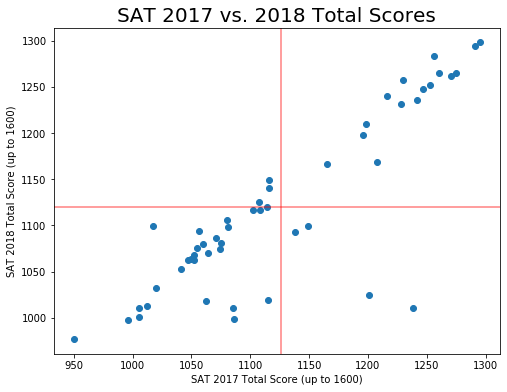

In [28]:
subplot_scatter(final,
                '2017_sat_total',
                '2018_sat_total',
                'SAT 2017 vs. 2018 Total Scores', 
                'SAT 2017 Total Score (up to 1600)', 
                'SAT 2018 Total Score (up to 1600)')

_As expected, the general pattern for the graph shows high correlation between two years of consecutive SAT testing. However, the bottom right quadrant of states show that, though they beat the 2017 SAT average, they scored worse than the average the following year. Here are those states:_

In [29]:
mask = (final['2017_sat_total'] > final['2017_sat_total'].mean()) & (final['2018_sat_total'] < final['2018_sat_total'].mean())
final[mask][['state','2017_sat_total','2018_sat_total','2017_sat_part','2018_sat_part']]

,state,2017_sat_total,2018_sat_total,2017_sat_part,2018_sat_part
5,Colorado,1201,1025,11,100
31,New Mexico,1138,1093,11,16
35,Ohio,1149,1099,12,18
44,Utah,1238,1010,3,4


_Colorado's plummet in SAT score can be explained by the fact that in 2018 the SAT became a mandatory test for 11th graders to take as a part of state assessments. With the increase in participants (by almost 90%!) and the fact that it was no longer optional, it is inevitable that a state's average score would fall.  
Furthermore, Utah's participation rate of only 3 to 4% is due to the fact that the [ACT is the mandatory test](https://www.schools.utah.gov/assessment/assessments). With only a small number of participants, we can expect there to be drastic changes to the average year-by-year.  
However, New Mexico and Ohio are a little more difficult to explain. Both states have a minor negative change of score from year-to-year (at most 50 points, which is well within the standard deviation of 92 points). Both states saw an increase in participants to the SAT, and perhaps this is the driving force of the lower score._ 

- Composite scores for ACT 2017 vs. 2018

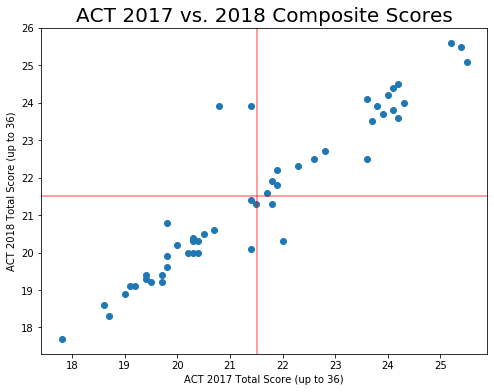

In [30]:
subplot_scatter(final,
                '2017_act_total',
                '2018_act_total',
                'ACT 2017 vs. 2018 Composite Scores', 
                'ACT 2017 Total Score (up to 36)', 
                'ACT 2018 Total Score (up to 36)')

_Once again, we observe a strong positive correlation between two consecutive compositive ACT state averages. But there are a few interesting observations here, as well. Let's take a look at the states that scored lower than the 2017 average but beat the 2018 average, and the states that beat the 2017 average but scored lower than the 2018 average._

In [31]:
mask = ((final['2017_act_total'] > final['2017_act_total'].mean()) & (final['2018_act_total'] < final['2018_act_total'].mean()) | (final['2017_act_total'] < final['2017_act_total'].mean()) & (final['2018_act_total'] > final['2018_act_total'].mean()))
final[mask][['state','2017_act_total','2018_act_total','2017_act_part','2018_act_part']]

,state,2017_act_total,2018_act_total,2017_act_part,2018_act_part
5,Colorado,20.8,23.9,100,30
13,Illinois,21.4,23.9,93,43
35,Ohio,22.0,20.3,75,100
37,Oregon,21.8,21.3,40,42


_We can safely disregard Oregon because the change in score is not very drastic. The other three states are worth noting. Colorado started making the SAT their mandatory test from the beginning of 2018. This meant that a great number of students no longer took the ACT, and Colorado had a drastic decrease in ACT participation in 2018. This meant that only students who payed on their own dime, so to say, took the test. Therefore, there was a drastic increase in Colorado's ACT average in 2018. Likewise, Illinois switched from mandatory ACT testing in 2016 to mandatory SAT testing in 2017. Therefore, there was still a lot of students who took the ACT in 2017 (many teachers encouraged their students to take the ACT, since that was the more familiar test for the teachers to teach!). However, there was a significant drop-off in 2018, meaning only students who paid for the test took it in 2018. Scores increased dramatically.  
On the opposite end of the spectrum, [Ohio provided state-funded, mandatory ACT tests in 2018](http://education.ohio.gov/Topics/Testing/State-Funded-ACT-Test), meaning that the every student took the test. This meant that there was a stark decrease in the average ACT score for Ohio in 2018._

- 2018 SAT and ACT total scores

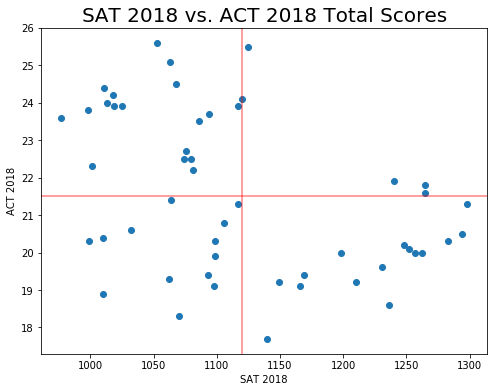

In [32]:
subplot_scatter(final,
                '2018_sat_total',
                '2018_act_total',
                'SAT 2018 vs. ACT 2018 Total Scores', 
                'SAT 2018', 
                'ACT 2018')

_As with the scatter plots above, I wanted to see if there was a change in the "Danger Zone" states from 2017. With some masking, here are the results:_

In [33]:
mask = (final['2018_sat_total'] < final['2018_sat_total'].mean()) & (final['2018_act_total'] < final['2018_act_total'].mean())
final[mask][['state','2018_sat_total','2018_act_total','2018_sat_part','2018_act_part']]

,state,2018_sat_total,2018_act_total,2018_sat_part,2018_act_part
1,Alaska,1106,20.8,43,33
9,Florida,1099,19.9,56,66
10,Georgia,1064,21.4,70,53
11,Hawaii,1010,18.9,56,89
31,New Mexico,1093,19.4,16,66
33,North Carolina,1098,19.1,52,100
35,Ohio,1099,20.3,18,100
36,Oklahoma,1062,19.3,8,100
37,Oregon,1117,21.3,48,42
40,South Carolina,1070,18.3,55,100


_Comparing the list of "Danger Zone" states to the ones in 2017, three states have since left the list (**Arizona, Illinois, and Nevada**), while four states have been added to it (**New Mexico, Ohio, Oregon, Utah**). The other states have been on the list for two years in a row. Alaska continues to be on the list._

- Participation rates of SAT and ACT in 2018

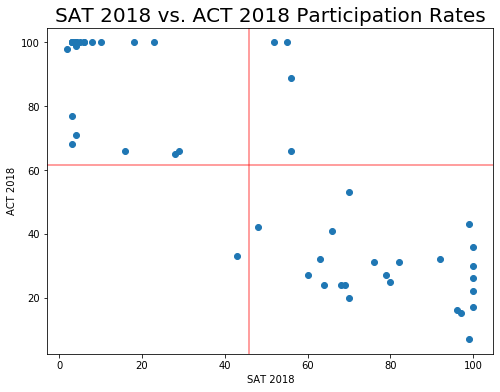

In [34]:
subplot_scatter(final,
                '2018_sat_part',
                '2018_act_part',
                'SAT 2018 vs. ACT 2018 Participation Rates', 
                'SAT 2018', 
                'ACT 2018')

_Wanting to see the relationship between the most recent participation rates for the two tests, I graphed a scatter plot between the two. It makes sense that there is a general negative correlation between the two tests, since taking one usually means a student will not take the other. As the red mean lines divide the graph, there are some interesting data points in the upper right and lower left quadrants. The upper right quadrant signifies states that have higher than average participation for both tests. The lower left quadrant denotes states that have lower than average participation for both tests. Here are those states:_

In [35]:
# (final['2018_sat_part'] > final['2018_sat_part'].mean()) & (final['2018_act_part'] > final['2018_act_part'].mean()) | 
mask = ((final['2018_sat_part'] < final['2018_sat_part'].mean()) & (final['2018_act_part'] < final['2018_act_part'].mean()))
final[mask][['state','2018_sat_part','2018_act_part']]

,state,2018_sat_part,2018_act_part
1,Alaska,43,33


_Only Alaska has lower than average participation rates for both the SAT and the ACT.  It makes sense for the ACT organization and the College Board to see it as a "battleground state", so to speak._

- Median Income and Test Participation

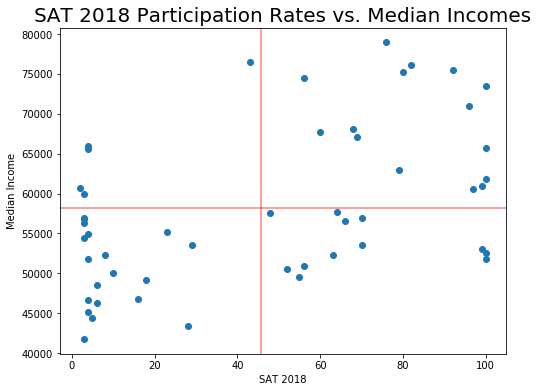

In [36]:
subplot_scatter(final,
                '2018_sat_part',
                'median_income',
                'SAT 2018 Participation Rates vs. Median Incomes', 
                'SAT 2018', 
                'Median Income')

_There is a slight positive correlation (r = 0.49) between median income and SAT participation.
With the data above, it is worthwhile to look at states where median income is higher, but SAT participation is relatively low._

In [37]:
mask = ((final['2018_sat_part'] < final['2018_sat_part'].mean()) & (final['median_income'] > final['median_income'].mean()))
final[mask][['state','2018_sat_part','2018_act_part', 'median_income']]

,state,2018_sat_part,2018_act_part,median_income
1,Alaska,43,33,76440
23,Minnesota,4,99,65599
34,North Dakota,2,98,60656
44,Utah,4,100,65977
50,Wyoming,3,100,59882


_Looking at the above data, it seems the states have a low participation rate on the SAT because they take the ACT as a mandatory test. One state that stands out, however, is Alaska. Though the state has a relatively high median income, it doesn't have mandatory state testing by either test._

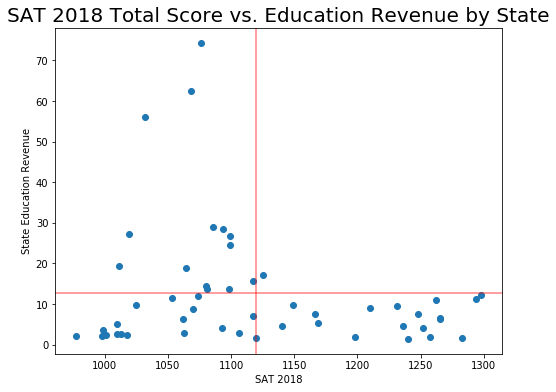

In [38]:
subplot_scatter(final,
                '2018_sat_total',
                'education_revenue',
                'SAT 2018 Total Score vs. Education Revenue by State', 
                'SAT 2018', 
                'State Education Revenue')

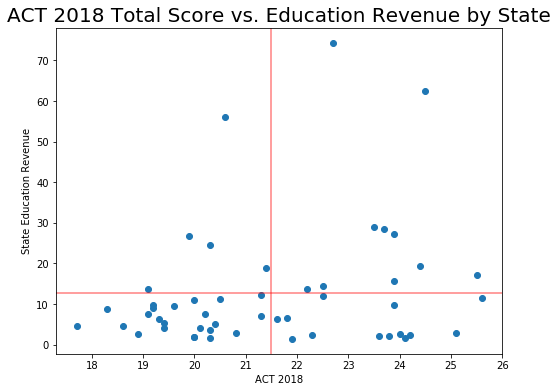

In [39]:
subplot_scatter(final,
                '2018_act_total',
                'education_revenue',
                'ACT 2018 Total Score vs. Education Revenue by State', 
                'ACT 2018', 
                'State Education Revenue')

_This was a comparison that I wanted to analyze. It seems that achievement on the SAT is impervious to Education Revenue, meaning that state spending on Education does not have a significant impact on average SAT achievement. On the other hand, avhievement on the ACT is a different story, with more states who spend more on education having a higher average ACT score._

### Boxplots to visualize quartile distribution

We can also use boxplots to visualize our data. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but we might be able to better identify clear outliers or differences in IQR, etc.

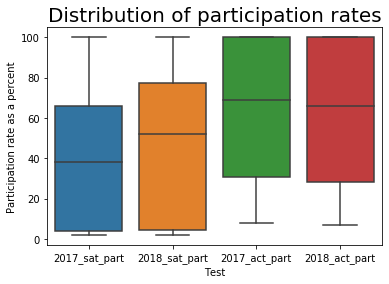

In [40]:
# Creating a box plot to compare participation rates
ax = sns.boxplot(data = final[['2017_sat_part','2018_sat_part','2017_act_part','2018_act_part']])
ax.set_title('Distribution of participation rates', fontsize = 20)
ax.set_ylabel('Participation rate as a percent')
ax.set_xlabel('Test');

_The boxplots of participation rates show that, for the most part, participation rates are steady between the two years. The IQR for the SAT has increased slightly._

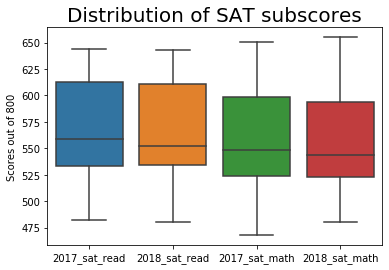

In [41]:
# Creating a box plot for 2017 and 2018 SAT subscores and composite scores
ax = sns.boxplot(data = final[['2017_sat_read','2018_sat_read','2017_sat_math','2018_sat_math']])
ax.set_title('Distribution of SAT subscores', fontsize = 20)
ax.set_ylabel('Scores out of 800');

_The distribution of SAT subscores have generally stayed the same. This should be true, since the SAT is a standardized test._

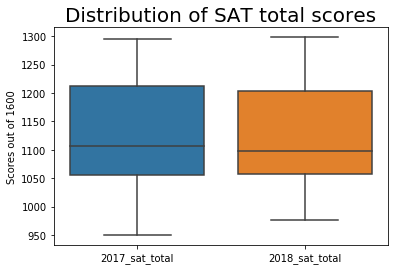

In [42]:
# Creating a box plot for 2017 and 2018 SAT total scores
ax = sns.boxplot(data = final[['2017_sat_total','2018_sat_total']])
ax.set_title('Distribution of SAT total scores', fontsize = 20)
ax.set_ylabel('Scores out of 1600');

_The distribution of SAT total scores have generally stayed the same. As stated above, this is the definition of a standardized test._

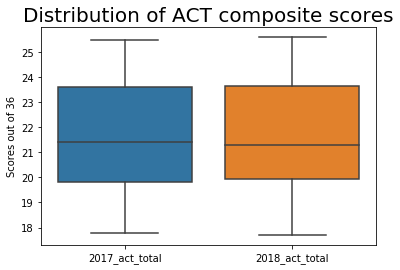

In [43]:
# Creating a box plot for 2017 and 2018 ACT composite scores
ax = sns.boxplot(data = final[['2017_act_total','2018_act_total']])
ax.set_title('Distribution of ACT composite scores', fontsize = 20)
ax.set_ylabel('Scores out of 36');

_Similar to the observations above, the distribution of ACT composite scores have generally stayed the same year to year._

## Descriptive and Inferential Statistics

#### Summarizing Distributions

In our data analysis, we want to have a complete understanding of data, which is imperative prior to modeling. Here are the different variables broken down in summary of its distribution.

_The distributions of the variables in the dataset are as follows:_
- 2017 SAT Participation has a mean of 39%, with a standard deviation of about 35%. However, the distribution is not normal, as there are three peaks in the data (as seen in the histogram previously). There is a peak between 0-10%, 60-70%, and 90-100%.
- 2017 SAT Evidence-Based Reading and Writing has a mean of 569, with a standard deviation of about 46. The distribution is not normal, but is bimodal, with two peaks.
- 2017 SAT Math has a mean of 557 and a standard deviation of about 47. While most of the data density is around the mean, there is a dense are of data in the upper portion of the distribution, between 600 and 625.
- 2017 SAT Total has a mean of 1126, with a standard deviation of 92. The distribution is bimodal, with one peak between 1050 and 1100, and another peak between 1200-1250.

- 2017 ACT Participation has a mean of 65% and a standard deviation of 32%. The distribution has two peaks; one around 30% and another around 100%. This is due to the fact that some states require the ACT test.
- 2017 ACT English has a mean of 20.9 points and a standard deviation of about 2.3 points. The distribution is not normal, and has three locations of data density (around 19, 21.5, and 24).
- 2017 ACT Math has a mean of 21.2 and a standard deviation of 2.0. The data is skewed right, with multiple peaks (points of data density). 
- 2017 ACT Science has a mean of 21.0 and a standard deviation of 3.2. The data has three peaks (around 20.9, 22.4, and 24.5).
- 2017 ACT Composite has a mean of 21.5, with a standard deviation of 2.0. The distribution has three peaks.

- 2018 SAT Participation has a mean of 46% and a standard deviation of 37%. The distribution has three locations of data density (around 5%, 65%, and 100%).
- 2018 SAT Evidence-Based Reading and Writing has a mean of 546 and a standard deviation of 48. There are two peaks; one peak is around 540, and the other is around 630. 
- 2018 SAT Math has a mean of 556 and a standard deviation of 48. There are two areas of data density; one around 535 and another around 630.
- 2018 SAT Total has a mean of 1120 and a standard deviation of 94. The distribution is almost trimodal, with peaks in the lower, middle, and upper range of the distribution.

- 2018 ACT Participation has a mean of 62% and a standard deviation of 34%. There are three areas of data density (one around 30%, another around 60%, and another around 100%).
- 2018 ACT Composite has a mean of 21.5 and a standard deviation of 2.1. The data is bimodal, with one peak occurring around 20.5 and another around 23.5

#### Normal Distributions?

_In our data, we can see that the distributions are not normal. None of the distributions for Math, Reading, or Participation rates are normal in our data set. This is likely due to the effect of mandatory testing (100% participation), and how that intrinsically impacts the scores. For example, a student who has to take the SAT will likely have a different mindset than a student who must pay with his or her own money to take the test._

_Furthermore, we have data that is already an aggregate function (the mean) of individual data points (students in a state that took the SAT or ACT).  Because each data entry is in itself an aggregate value, we would have to know how those individual aggregate values were determined (the number of students in each state, specifically). In other words, it doesn't really make sense to compare Alaska's average SAT to California's average SAT (since Alaska has much fewer students who took the SAT than California). With that being said, it wouldn't make much sense to conduct statistical inference on this specific set of data._

_Therefore, it might not be very appropriate to compare ACT and SAT math scores for 2017 (or any year, for that matter). It might be more appropriate if we were to compare data compiled over several years, where the volatile nature of changing participation rates might have less impact on the data._

## Outside Research

_Alaska is a market that can be capitalized upon since it has low participation rates in both the SAT and ACT, has below average scores on both the SAT and the ACT, and has much to gain from a state-funded college entrance exam._

In [44]:
final[['state','median_income','college_bound','2018_sat_part','2018_act_part', '2017_pop_est']].sort_values(by='college_bound').head()

,state,median_income,college_bound,2018_sat_part,2018_act_part,2017_pop_est
8,District of Columbia,75506,0.0,92,32,693972
12,Idaho,51807,43.7,100,36,1716943
1,Alaska,76440,44.0,43,33,739795
44,Utah,65977,45.3,4,100,3101833
37,Oregon,57532,47.6,48,42,4142776


_[Article](https://www.adn.com/opinions/2016/07/06/why-many-alaskan-students-never-come-back-from-college-and-how-to-change-that/) about why many Alaskan high schoolers don't go to college.  
[Article](https://www.vox.com/policy-and-politics/2018/2/13/16997188/alaska-basic-income-permanent-fund-oil-revenue-study) on one of the reasons for Alaskans' high median income, the "Permanent Fund Oil Revenue"_

## Conclusions and Recommendations

Making the SAT more widely available (maybe even mandatory) in Alaska would:
- Prepare Alaskan students to be a more diverse workforce
- Help future-proof Alaska (as oil revenue might not always be there)
- Help both public and private universities in Alaska to have a larger student base, improving the higher education options Alaskans have

Some additional data to better inform suggestions could be data on what kind of occupations students are most interested in and pursue, what the per pupil educational spending is, and other education-based information.